In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [2]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]
model = LinearRegression()


#Your code:
model.fit(X,y)
model

#Hint: .fit()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

coefficient of determination: 0.496708801663114
intercept: -32304.654721028113
slope: [269.46205468]


Text(0, 0.5, 'price')

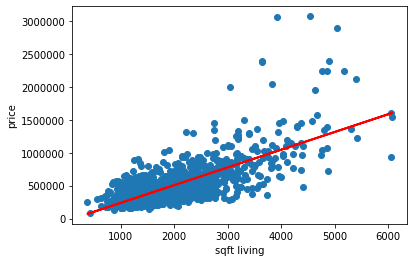

In [3]:
#b) Your code:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

y_pred = model.predict(X)
#print('predicted response:', y_pred, sep='\n')

plt.scatter(X, y)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel("sqft living")
plt.ylabel("price")


#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

coefficient of determination: 0.496708801663114
Degree:  1


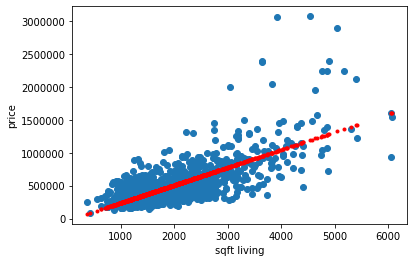

coefficient of determination: 0.5238491329967203
Degree:  2


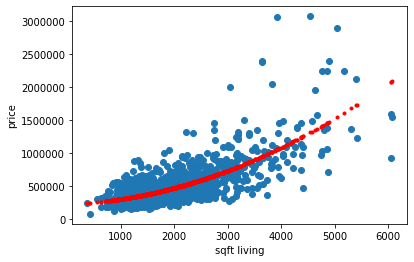

coefficient of determination: 0.5328598665920146
Degree:  3


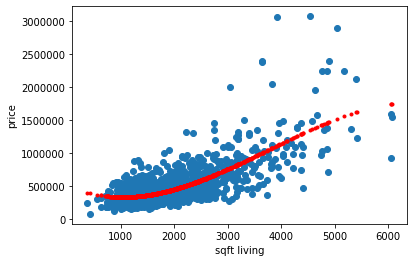

coefficient of determination: 0.5414532680663733
Degree:  4


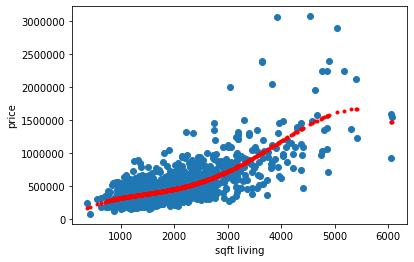

coefficient of determination: 0.5427985632327249
Degree:  5


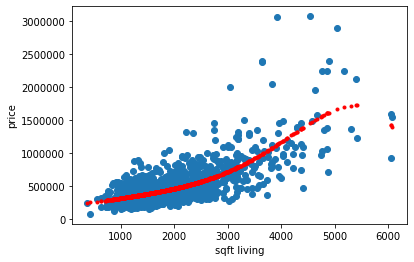

coefficient of determination: 0.5437265285581634
Degree:  6


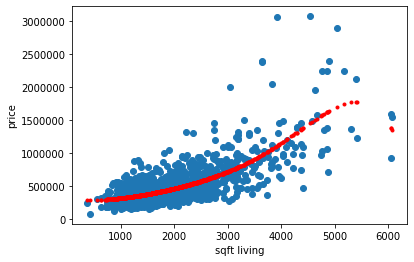

coefficient of determination: 0.5444148338817558
Degree:  7


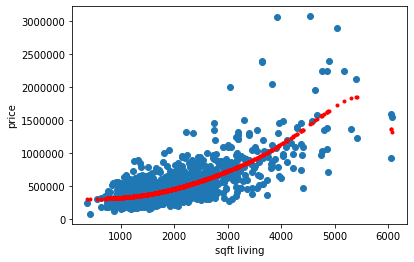

coefficient of determination: 0.5438909316090498
Degree:  8


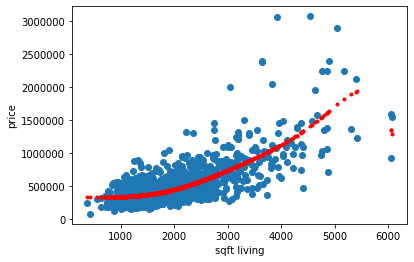

In [4]:
#c)
errors = []
for order in range(1,9):

    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
#Your code:
    model_poly = LinearRegression().fit(X_order, y)
    r_sq = model_poly.score(X_order, y)
    
    #calculating error
    errors.append(mean_squared_error(model_poly.predict(X_order), y))   

    print('coefficient of determination:', r_sq)
    #print('intercept:', model_poly.intercept_)
    #print('coefficients:', model_poly.coef_)

    y_pred = model_poly.predict(X_order)
    print("Degree: ", order)
    plt.scatter(X, y)
    plt.plot(X, y_pred, '.', color='red', linewidth = 2)
    plt.xlabel("sqft living")
    plt.ylabel("price")
    plt.show()




Text(0, 0.5, 'error')

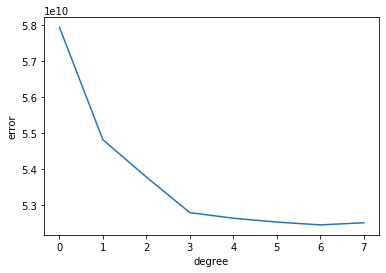

In [5]:
#Your code:
#error plot
plt.plot(errors)
plt.xlabel("degree")
plt.ylabel("error")


## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

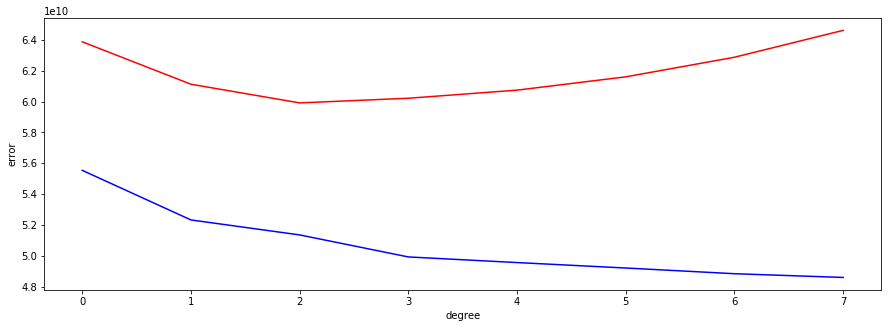

In [6]:
#a)
train_error = []
test_error = []

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    
    linear = LinearRegression().fit(X_train, y_train)
    y_pred = linear.predict(X_train)
    linear.predict(X_train)
    train_error.append(mean_squared_error(y_train, y_pred))
    
    y_pred = linear.predict(X_test)
    linear.predict(X_test)
    test_error.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=[15,5])
plt.plot(train_error, color ="blue")
plt.plot(test_error, color = "red")
plt.xlabel("degree")
plt.ylabel("error")
plt.show()
    

    
    

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

Text(0, 0.5, 'sqft living')

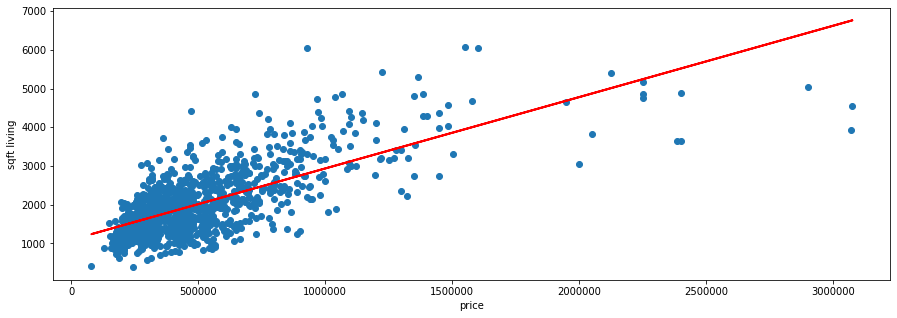

In [7]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=[15,5])
plt.scatter(X, y)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel("price")
plt.ylabel("sqft living")



In [8]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model: added more variables and lowered degree to 2

X = house_df[['sqft_living', 'sqft_lot', 'condition', 'grade', 'zipcode', 'yr_renovated', 'yr_built']].values.reshape(-1,7)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(2, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))



Mean squared error equals: 48749916937.6804
Mean squared error equals: 44068477032.383514
